In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [56]:
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve

from sklearn.preprocessing import binarize 

In [6]:
pima = pd.read_csv("C:\\Users\\cheta\\Downloads\\pima-indians-diabetes (1).csv")

In [7]:
pima.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
column_names = ['pregnent','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima.columns = column_names

In [10]:
pima.head()

,pregnent,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
feature_cols = ['pregnent','glucose','bp','skin','insulin','bmi','age']
X = pima[feature_cols]
y = pima['label']

In [12]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
X_train.head(4)

,pregnent,glucose,bp,skin,insulin,bmi,age
663,9,145,80,46,130,37.9,40
712,10,129,62,36,0,41.2,38
161,7,102,74,40,105,37.2,45
509,8,120,78,0,0,25.0,64


In [14]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_pred = lr.predict(x_test)

In [17]:
accuracy_score(y_test, y_pred)

0.7727272727272727

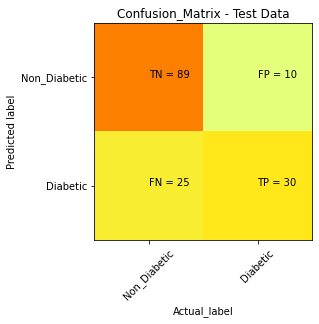

In [33]:
cm = confusion_matrix(y_test,y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
class_names = ['Non_Diabetic', 'Diabetic']
plt.title("Confusion_Matrix - Test Data")
plt.xlabel("Actual_label")
plt.ylabel("Predicted label")
tick_mark = np.arange(len(class_names))
plt.xticks(tick_mark, class_names, rotation=45)
plt.yticks(tick_mark, class_names)
s = [['TN','FP'], ['FN','TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]+" = "+str(cm[i][j])))
        
plt.show()       

In [34]:
precision_score(y_test,y_pred)

0.75

In [35]:
recall_score(y_test,y_pred)

0.5454545454545454

In [37]:
f1_score(y_test,y_pred)

0.631578947368421

In [40]:
lr.predict_proba(x_test)

array([[0.59246419, 0.40753581],
       [0.64578513, 0.35421487],
       [0.82896274, 0.17103726],
       [0.95122023, 0.04877977],
       [0.79815348, 0.20184652],
       [0.70752122, 0.29247878],
       [0.63025617, 0.36974383],
       [0.88464905, 0.11535095],
       [0.83195048, 0.16804952],
       [0.77377574, 0.22622426],
       [0.53210172, 0.46789828],
       [0.94125174, 0.05874826],
       [0.04763335, 0.95236665],
       [0.25442108, 0.74557892],
       [0.98797735, 0.01202265],
       [0.23191766, 0.76808234],
       [0.78234445, 0.21765555],
       [0.68929818, 0.31070182],
       [0.85707471, 0.14292529],
       [0.86752529, 0.13247471],
       [0.70879698, 0.29120302],
       [0.91474374, 0.08525626],
       [0.04069463, 0.95930537],
       [0.68480782, 0.31519218],
       [0.93328978, 0.06671022],
       [0.55159502, 0.44840498],
       [0.781901  , 0.218099  ],
       [0.2643877 , 0.7356123 ],
       [0.93432102, 0.06567898],
       [0.6173571 , 0.3826429 ],
       [0.

In [45]:
y_pred_proba = lr.predict_proba(x_test)[:,1]

In [46]:
y_pred_proba

array([0.40753581, 0.35421487, 0.17103726, 0.04877977, 0.20184652,
       0.29247878, 0.36974383, 0.11535095, 0.16804952, 0.22622426,
       0.46789828, 0.05874826, 0.95236665, 0.74557892, 0.01202265,
       0.76808234, 0.21765555, 0.31070182, 0.14292529, 0.13247471,
       0.29120302, 0.08525626, 0.95930537, 0.31519218, 0.06671022,
       0.44840498, 0.218099  , 0.7356123 , 0.06567898, 0.3826429 ,
       0.37495925, 0.30775851, 0.04512463, 0.76024733, 0.09909899,
       0.674801  , 0.07026202, 0.15745456, 0.10810517, 0.68211452,
       0.18653343, 0.08019676, 0.03178831, 0.19173815, 0.05826969,
       0.02276143, 0.80943811, 0.86110409, 0.06782268, 0.15417588,
       0.00905585, 0.13567   , 0.85197031, 0.052084  , 0.71125121,
       0.08565856, 0.6496703 , 0.24747807, 0.55337605, 0.18940381,
       0.63471565, 0.01284758, 0.74000672, 0.24794074, 0.34811497,
       0.12068089, 0.01147073, 0.3437618 , 0.76696439, 0.59121369,
       0.91523752, 0.79055643, 0.52417142, 0.01601183, 0.71561

In [47]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [49]:
y_pred_classified = np.where(y_pred_proba>0.3,1,0)

In [51]:
y_pred_classified

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [53]:
precision_score(y_test,y_pred_classified)

0.6231884057971014

In [54]:
recall_score(y_test,y_pred_classified)

0.7818181818181819

In [55]:
f1_score(y_test,y_pred_classified)

0.6935483870967741

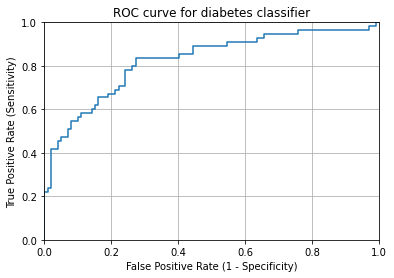

In [63]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)